<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/OB/ESAA_OB_week02_2_Ensemble_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **5. 부스팅**

**부스팅(Boosting)** 은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법을 말한다. 부스팅 방법 중 가장 인기 있는 것은 **에이다부스트(AdaBoost)** 와 **그레이디언트 부스팅(Gradient Boosting)** 이다.

### **5.1) 에이다부스트**
이전 예측기를 보완하는 새로운 예측기를 만드는 방법은 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 것이다. 이렇게 하면 새로운 예측기는 학습하기 어려운 샘플에 점점 더 맞춰지게 된다.
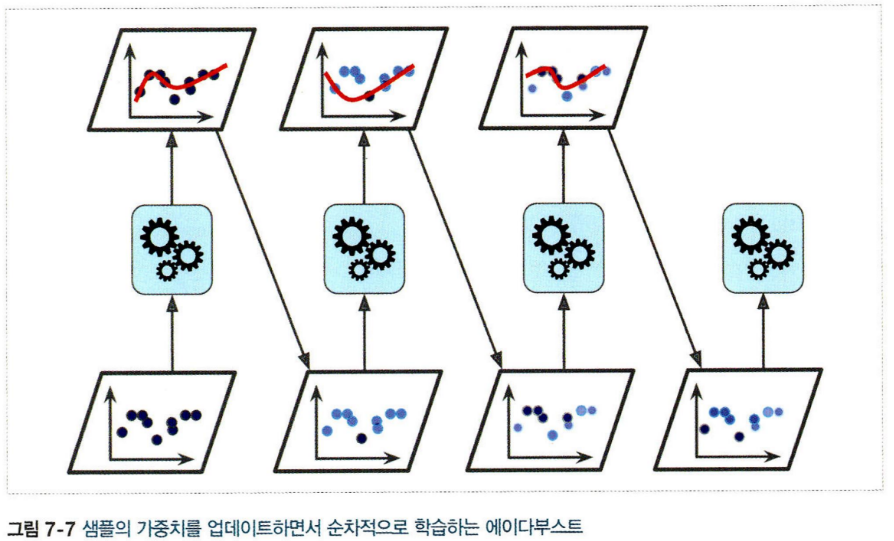

경사하강법은 비용 함수를 최소화하기 위해 한 예측기의 모델 파라미터를 조정해가는 반면 에이다부스트는 점차 더 좋아지도록 앙상블에 예측기를 추가한다. 모든 예측기가 훈련을 마치면 앙상블은 배깅이나 페이스팅과 비슷한 방식으로 예측을 만든다.

각 샘플 $w^{(i)}$는 초기에 $\frac{1}{m}$로 초기화된다. 첫 번째 예측기가 학습되고, 가중치가 적용된 에러율 $r_1$이 훈련 세트에 대해 계산된다.

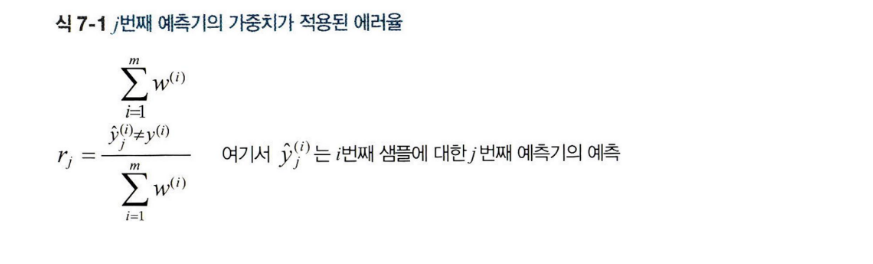

예측기의 가중치 $\alpha_j$는 아래 식을 사용해 계산된다. 여기서 $\eta$는 학습률 하이퍼파라미터이다. 예측기가 정확할수록 가중치가 더 높아지게 된다. 만약 무작위로 예측하는 정도라면 가중치가 0에 가까울 것이다.

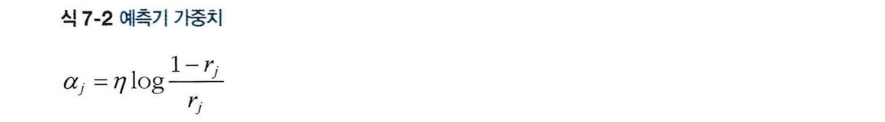

그다음 에이다부스트 알고리즘이 아래 식을 사용해 샘플의 가중치를 업데이트 한다. 즉, 잘못 분리된 샘플의 가중치가 증가된다.

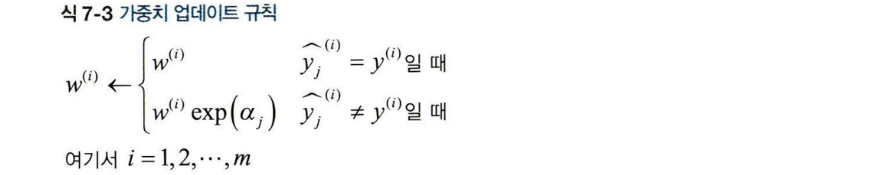

그런 다음 모든 샘플의 가중치를 정규화한다.

마지막으로 새 예측기가 업데이트된 가중치를 사용해 훈련되고 전체 과정이 반복된다. 이 알고리즘은 지정된 예측기 수에 도달하거나 완벽한 예측기가 만들어지면 중지된다.

예측을 할 때 에이다부스트는 단순히 모든 예측기의 예측을 계산하고 예측기 가중치 $\alpha_j$를 더해 예측 결과를 만든다. 가중치 합이 가장 큰 클래스가 예측 결과가 된다.

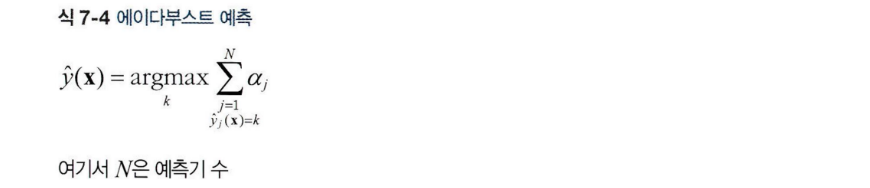

사이킷런은 SAMME 라는 에이다부스트의 다중 클래스 버전을 사용한다. 클래스가 두 개뿐일 때는 SAMME가 에이다부스트와 동일하다. 예측기가 클래스의 확률을 추정할 수 있다면 사이킷런은 SAMME.R이라는 SAMME의 변종을 사용한다. 이 알고리즘은 예측값 대신 클래스 확률에 기반하며 일반적으로 성능이 더 좋다.

다음은 사이킷런의 AdaBoostClassifier를 사용해 200개의 아주 얕은 **결정 트리**를 기반으로 하는 에이다부스트 분류기를 훈련시킨다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

# 5장에서의 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5
)

ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

## **5.2 그레이디언트 부스팅**

인기가 높은 또 하나의 부스팅 알고리즘은 **그레이디언트 부스팅(Gradient Boosting)** 이다. 에이다부스터처럼 그레이디언트 부스팅은 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가한다. 하지만, 에이다부스터처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 **잔여 오차**(residual error)에 새로운 예측기를 학습시킨다.

결정 트리를 기반 예측기로 사용하는 간단한 회귀 문제를 풀어보자. 이를 **그레이디언트 트리 부스팅** 또는 **그레이디언트 부스티드 회귀 트리** 라고 한다.

In [5]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [6]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [7]:
y3 = y2-tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

In [9]:
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

트리가 앙상블에 추가될수록 앙상블의 예측이 점차 좋아진다.

사이킷런의 GradientBoostingRegressor을 사용하면 GRBT 앙상블을 간단하게 훈련시킬 수 있다. 트리 수와 같이 앙상블의 훈련을 제어하는 매개변수는 물론 RandomForestRegressor와 비슷하게 결정 트리의 성장을 제어하는 매개변수를 가지고 있다.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

learning_rate 매개변수가 각 트리의 기여 정도를 조절한다. 낮게 설정하면 앙상블을 훈련 세트에 학습시키기 위해 많은 트리가 필요하지만 일반적으로 예측의 성능은 좋아진다. 이는 **축소**(shrinkage)라고 부르는 규제 방법이다.

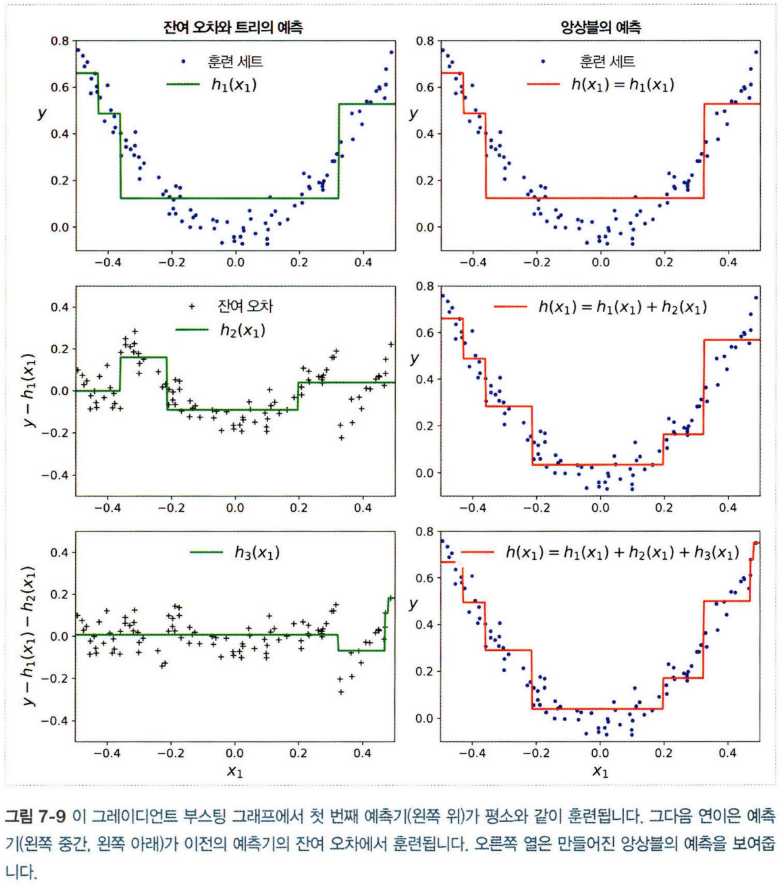

최적의 트리 수를 찾기 위해서는 조기 종료 기법을 사용할 수 있다. 간단하게 구현하려면 staged_predict( ) 메서드를 사용한다. 이 메서드는 훈련의 각 단계에서 앙상블에 의해 만들어진 예측기를 순회하는 반복자를 반환한다. 다음 코드는 120개의 트리로 GBRT 앙상블을 훈련시키고 최적의 트리 수를 찾기 위해 각 훈련 단계에서 검증 오차를 측정한다.

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(108))

실제로 훈련을 중지하는 방법으로 조기 종료를 구현할 수도 있다. warm_start=True로 설정하면 사이킷런이 fit( ) 메서드가 호출될 때 기존 트리를 유지하고 훈련을 추가할 수 있도록 한다.

In [12]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("Inf")
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # 조기 종료

GradientBoostingRegressor는 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정할 수 있는 subsample 매개변수도 지원한다.

최적화된 그레이디언트 부스팅 구현으로 XGBoost 파이썬 라이브러리가 유명하다. 이 패키지의 목표는 매우 빠른 속도, 확장성, 이식성이다.

In [13]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [14]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds=2)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.36733
[1]	validation_0-rmse:0.26573
[2]	validation_0-rmse:0.19231
[3]	validation_0-rmse:0.14059
[4]	validation_0-rmse:0.10059
[5]	validation_0-rmse:0.07644
[6]	validation_0-rmse:0.05702
[7]	validation_0-rmse:0.04900
[8]	validation_0-rmse:0.04614
[9]	validation_0-rmse:0.04579
[10]	validation_0-rmse:0.04537
[11]	validation_0-rmse:0.04659
[12]	validation_0-rmse:0.04570


## **6. 스태킹**
**스태킹**은 앙상블에 속한 모든 예측기의 예측을 취합하는 모델을 훈련한다. 스태킹에서 예측기는 각각 다른 값을 예측하고 마지막 예측기 (**블렌더** 또는 **메타 학습기**)가 이 예측을 입력으로 받아 최종 예측을 만든다.

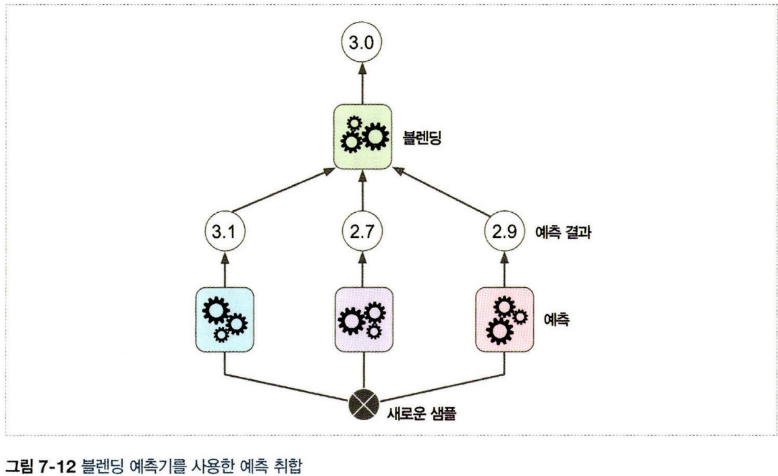

블렌더를 학습시키는 일반적인 방법은 홀드 아웃 세트를 사용하는 것이다. 먼저 훈련 세트를 두 개의 서브셋으로 나눈다. 첫 번째 서브셋은 첫번째 레이어의 예측을 훈련시키기 위해 사용된다. 그런 다음 첫 번째 레이어의 예측기를 사용해 두 번째 (홀드 아웃) 세트에 대한 예측을 만든다. 예측기들이 훈련하는 동안 이 샘플들을 전혀 보지 못했기에 이때 만들어진 예측은 완전히 새롭다. 홀드 아웃 세트의 각 샘플에 대해 세 개의 예측값이 있다. 타깃값은 그대로 쓰고 앞서 예측한 값을 입력 특성으로 사용하는 새로운 훈련 세트를 만들 수 있다. 즉, 첫번째 레이어의 예측을 가지고 타깃값을 예측하도록 학습된다.

이런 방식의 블렌더를 여러 개 훈련시키는 것도 가능하다. 그러면 블렌더만의 레이어가 만들어지게 된다.

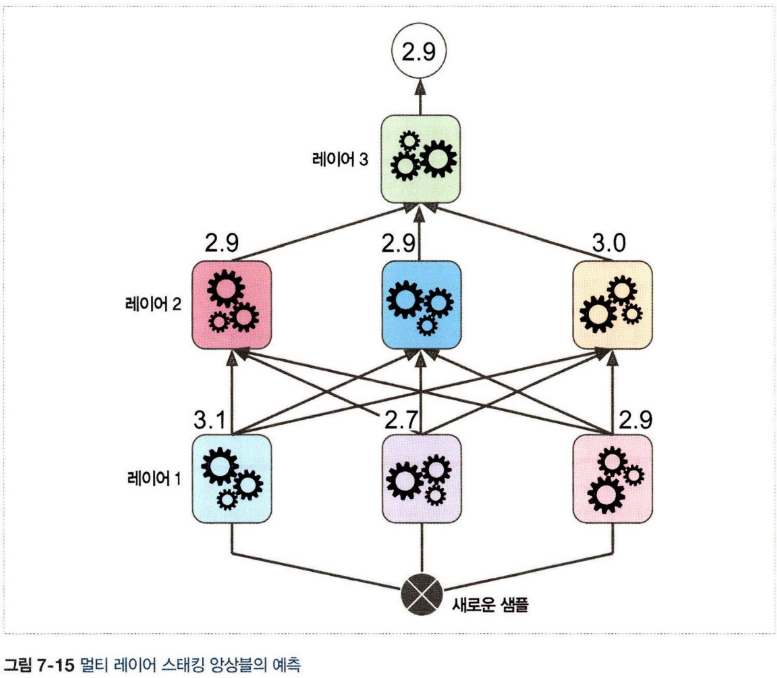